In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wine=load_wine()
X=wine.data
y=wine.target

print("Feature shape:",X.shape)
print("Target shape:", y.shape)
print("Class names:", wine.target_names)
print("Feature names:", wine.feature_names[:5], "...")

Feature shape: (178, 13)
Target shape: (178,)
Class names: ['class_0' 'class_1' 'class_2']
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium'] ...


In [4]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 142
Test size: 36


In [5]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("Train mean (approx):", X_train_scaled.mean())
print("Test std (approx):", X_test_scaled.std())

Train mean (approx): 1.133798724823047e-15
Test std (approx): 0.9336128308242162


In [6]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred=knn.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)

print("Accuracy with k=3:", accuracy)

Accuracy with k=3: 0.9444444444444444


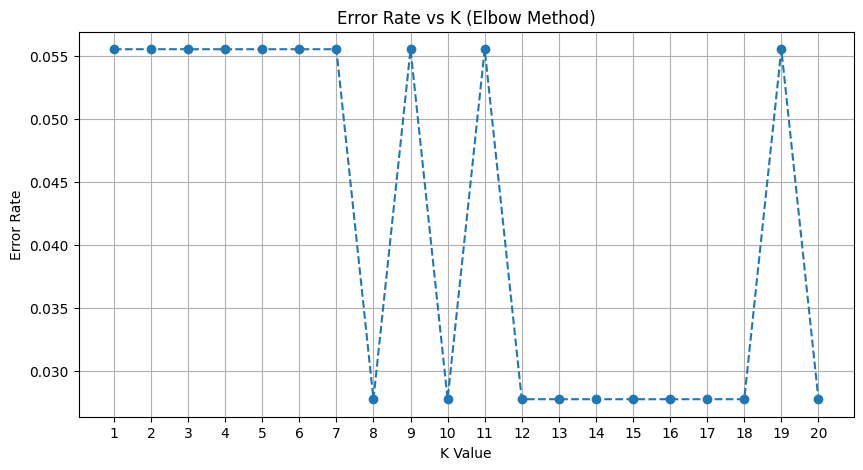

In [9]:
error_rate=[]

for k in range(1, 21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k=knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k !=y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--')
plt.title("Error Rate vs K (Elbow Method)")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [10]:
k_values=range(1, 21)
cv_scores=[]

for k in k_values:
    knn_cv=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k=k_values[cv_scores.index(max(cv_scores))]
print("Cross-Validation scores:", cv_scores)
print("Best K from cross-validation:", best_k)

Cross-Validation scores: [np.float64(0.9504926108374384), np.float64(0.9369458128078818), np.float64(0.9576354679802955), np.float64(0.9504926108374384), np.float64(0.9509852216748769), np.float64(0.9509852216748769), np.float64(0.9507389162561577), np.float64(0.9438423645320198), np.float64(0.9369458128078818), np.float64(0.9440886699507389), np.float64(0.9438423645320198), np.float64(0.9578817733990148), np.float64(0.9647783251231526), np.float64(0.9576354679802955), np.float64(0.9507389162561577), np.float64(0.9507389162561577), np.float64(0.9507389162561577), np.float64(0.9578817733990148), np.float64(0.9578817733990148), np.float64(0.9578817733990148)]
Best K from cross-validation: 13


In [12]:
knn_final=KNeighborsClassifier(n_neighbors=12)
knn_final.fit(X_train_scaled, y_train)

y_pred_final=knn_final.predict(X_test_scaled)

final_accuracy=accuracy_score(y_test, y_pred_final)
cm=confusion_matrix(y_test, y_pred_final)
report=classification_report(y_test, y_pred_final, target_names=wine.target_names)

print("Final Model Accuracy:", final_accuracy)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Final Model Accuracy: 0.9722222222222222

Confusion Matrix:
[[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

